- In 2017, researchers at Google published a paper that proposed a novel neural network acrhitecture for sequence modelling.

- Dubbed the **Transformer**, this architecture outperformed RNNs on machine translation tasks, both in terms of translation quality and training cost.

- In parallel, an effective transfer learning method called ULMFiT showed that training long short-term memory (LSTM) networks on a very large and diverse corpus could produce state-of-the-art text classifiers with little lebelled data.

- These advances were the catalyst for two of today's most well-known transformers:
 - the Generative Pretrained Transformer  (GPT)
 - and Bidirectional Encoder Representations from Transformers (BERT).

- By combining the Transformer architecture with unsupervised learning, these models removed the need to train task-specific architectures from scratch and broke almost every benchmark in NLP by a significant margin.

- Since the release of GPT and BERT, a zoo of transformer models has emerged.

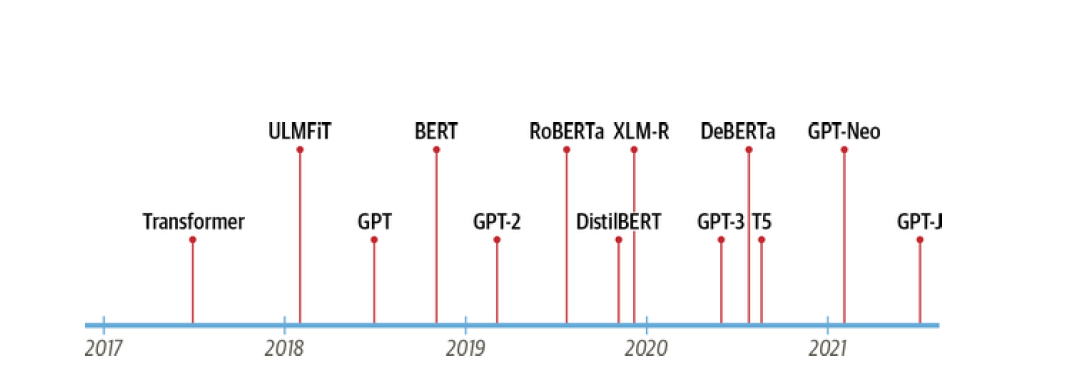

- But we are getting ahead of ourselves.
- To understand what is novel about transformers, we first need to explain:

 - **The encoder-decoder framework**
 - **Attention mechanisms**
 - **Tranfer learning**


### **The Encoder-Decoder Framework**

- Prior to transformer, recurrent architecture such as LSTMs were the state of the art in NLP.

- These architectures contain a feedback loop in the network connections that allows information to propagate from one step to another, making them ideal for modeling sequential data like text.

- An RNN receives some input (which could be a word or character), feeds it through the network, and outputs a vector called hidden state.

- At the same time, the model feeds some information back to itself through the feedback loop, which it can then use in the next step.

- The RNN passes information about its state at each step to the next operation in the sequence.

- This allows an RNN to keep track of information from previous steps, and use it for its output predictions.

- These architectures were (and continue to be) widely used for NLP tasks, speech processing, and time series.

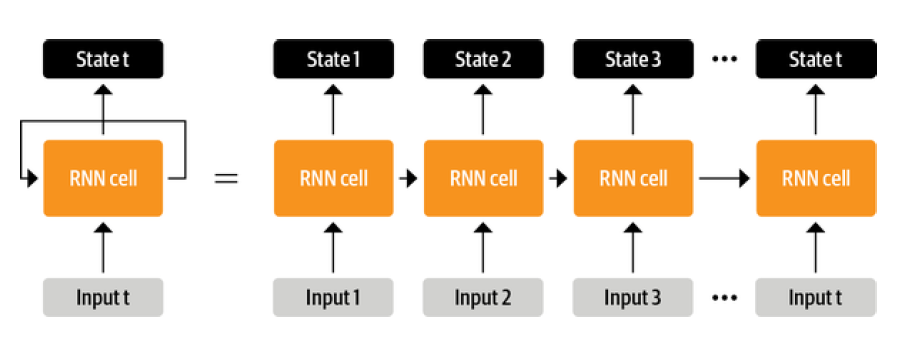

- One are where RNNs played an important role was in the development of machine translation systems, where the objective is to map a sequence of words in one language to another.

- This kind of task is usually tackled with an **encoder-decoder** or **sequence-to-sequence** architecture. which is well suited for situations where the input and output are both sequences of arbitrary length.

- The job of the encoder is to encode the information from the input sequence into a numerical representation that is often called the last hidden state.

- This state is then passed to the decoder, which generates the output sequence.

- In general, the encoder and decoder components can be any kind of neural network architecture that can model sequences.

- In figure given below, The english sentence "Transformers are great!" is encoded as a hidden state vector that is then decoded to produce the German translation "Transformers sind grossarting!" The input words are fed sequentially through the encoder and the output words are generated one at a time, from top to bottom.

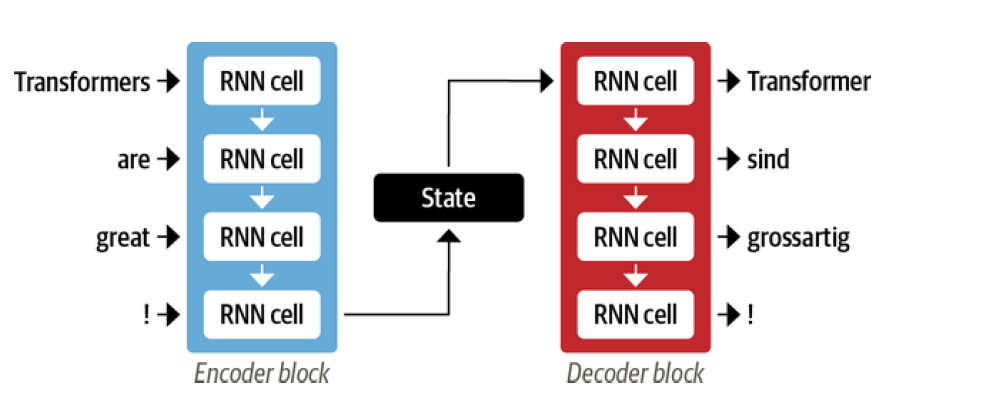

- Although elegant in its simplicity, one weakness of this architecture is that the final hidden state of the encoder creates an information bottleneck: it has to represent the meaning of the whole input sequence because this is all the decoder has access to when generating the output.

- This is especially challenging for long sequences, where information at the start of the sequence might be lost in the process of compressing everything to a single, fixed representation.

- Fortunately, there is a way out of this bottleneck by allowing the decoder to have access to all of the encoder's hidden states.

- The general mechanism for this is called attention, and is a key component in many modern neural network architectures.

- Understanding how attention was developed for RNNs will put us in good shape to understand one of the main building blocks of the transformer architecture.

In [ ]:
####################################################################################################################################################################################################
#                                                                                                                                                                                                  #
####################################################################################################################################################################################################

### **Attention Mechanisms**

- The main idea behind attention is that instead of producing a single hidden state for the input sequence, the encoder outputs a hidden state at each step that the decoder can access.

- However, using all the states at the same time would create a huge input for the decoder, so some mechanism is needed to prioritize which states to sue.

- This is where attention comes in: it lets the decoder assign a different amount of weight, or **"attention"** to each of the encoder states at every decoding timestep.

- This process is illustrated below, where the role of attention is shown for predicting the third token in the output sequence.

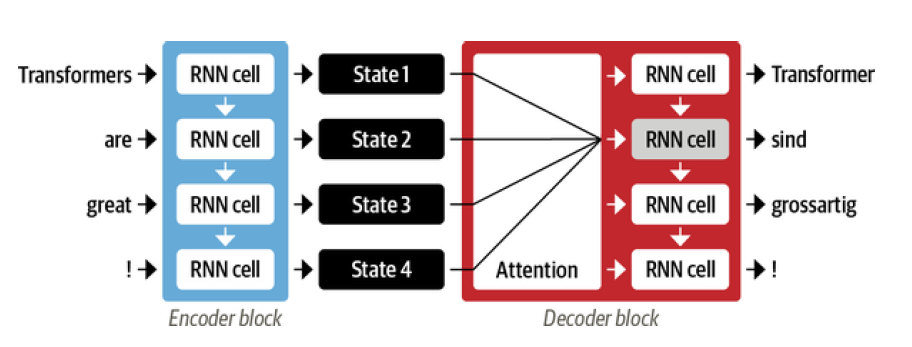

- By focusing on which input tokens are most relevant at each timestep, these attention-based models are able to learn nontrivial alignments between the words in a generated translation and those in a source sentence.

- From below figure, we can visualizes the attention weights for an English to French translation model, where each pixel denotes a weight.

- The figure shows how the decoder is able to correctly align the words "Zone" and "Area", which are ordered differently in the two languages.

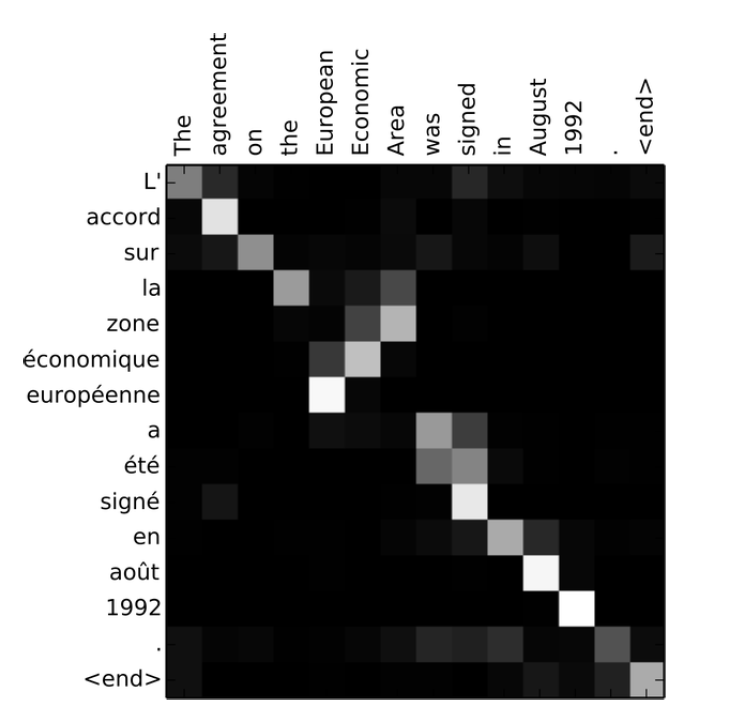

- Although attention enabled the production of much better translations, there was still a major shortcoming with using recurrent models for the encoder and decoder: the computations are inherently sequential and cannot be parallelized across the input sequence.

--------------------------------------------------------------------------------

- With the **transformer**, a new modeling paradigm was introduced: dispense with recurrence altogether, and instead rely entirely on a special form of attention called self-attention.

- Basic idea behind self-attention is to allow attention to operate on all the states in the same layer of the neural network.

- This is show in below figure, where both the encoder and the decoder have their own self-attention mechanisms, whose outputs are fed to feed-forward neuarl networks (FF NNs).

- This architecture can be trained much faster than recurrent models and paved the way for many of the recent breakthroughs in NLP.

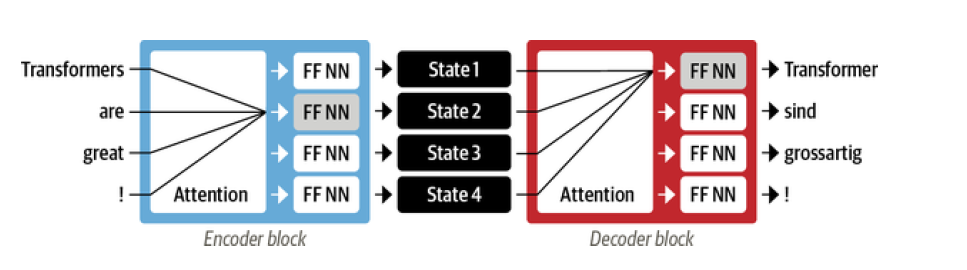

- In the original Transformers paper, the translation model was trained from scratch on a large corpus of sentence pairs in various languages.

- However, in many practical applications of NLP we do not have access to large amounts of labeled text data to train our models on.

- A final piece was missing to get the transformer revolution started: transfer learning.

In [ ]:
####################################################################################################################################################################################################
#                                                                                                                                                                                                  #
####################################################################################################################################################################################################

### **Transfer Learning in NLP**

- It is nowdays common practice in computer vision to use transfer learning to train a convolutional neural network like ResNet on one task, and then adapt it to or fine-tune it on a new task.

- This allows the network to make use of the knowledge learned from the original task.

- Architecturally, this involves splitting the model into a body and a head, where the head is a task-specific network.

- During training, the weights of the body learn broad features of the source domain, and these weights are used to initialize a new model for the new task.

- Compared to traditional supervised learning, this approach typically produces high-quality models that can be trained much more efficiently on a variety of downstream tasks, and with much less labeled data.

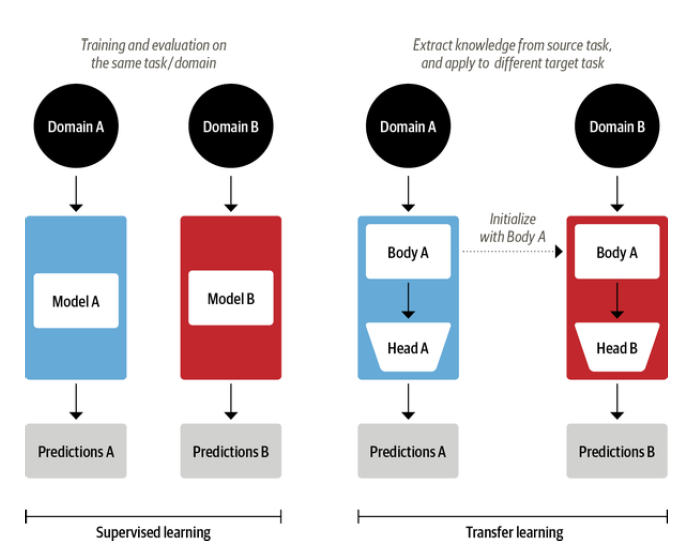

- In computer vision, the models are first trained on large-scale datasets such as ImageNet, which contain millions of images.

- This process is called pretraining and its main purpose is to teach the models the basic features of images, such as edges or colors.

- These pretrained models can then be fine tuned on a downstream task such as classifying flower species with a relatively small number of labeled examples (usually a few hundred per class).

- Fine-tuned models typically achieve a higher accuracy than supervised models trained from scratch on the same amount of labeled data.

- In 2017 and 2018, several research groups proposed new approaches that finally made transfer learning work for NLP.

- It started with an insight from researchers at OpenAI who obtained strong performance on a sentiment classification task by using features extracted from unsupervised pretraining.

- This was followed by ULMFit, which introduced a general framework to adapt pretrained LSTM models for various tasks.

### ULMFiT involves three main steps:

 - **Pretraining**
   - The initial training objective is quite simple: predict the next word based on the previous words. This task is referred to as language modeling. The elegance of this approach lies in the fact that no labeled data is required, and one can make use of abundantly available text from sources such as Wikipedia.

 - **Domain adaptation**
  - Once the language model is pretrained on a large-scale corpus, the next step is to adapt it to the in-domain corpus (e.g., from Wikipedia to the IMDb corpus of movie reviews). This stage still uses language modeling, but now the model has to predict the next word in the target corpus.

 - **Fine-tuning**
  - In this step, the language model is fine-tuned with a classification layer for the target task (e.g., classifying the sentiment of movie reviews)

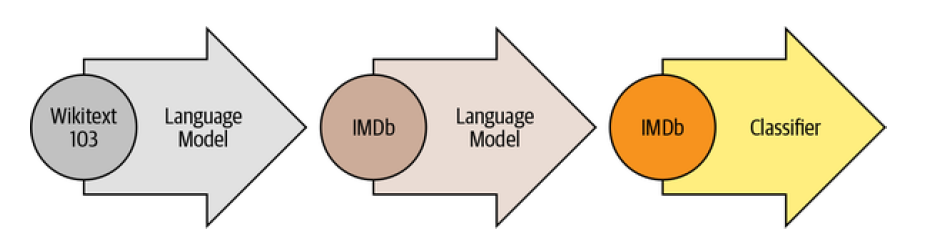

- By introducing a viable framework for pretraining and transfer learning in NLP, ULMFiT provided the missing piece to make transformers take off.

- In 2018, two transformers were released that combined self-attention with transfer learning:
 - **GPT**
   - Uses only the **decoder** part of the transformer architecture, and the same language modeling approach as ULMFiT. GPT was pretrained on the BookCorpus, which consists of 7,000 unpublished books from a variety of genres including Adventure, Fantasy, and Romance.
  
  - **BERT**
   - Uses the **encoder** part of the Transformer architecture, and a special form of language modeling called **masked language modeling**.The objective of masked language modeling is to predict randomly masked words in a text\.
   For example, given a sentence like ""I looked at my [MASK] and saw that [MASK] was late." the model needs to predcit the most likely candidates for the masked words that are denoted by [MASK]. BERT was pretrained on the BooksCorpus and English Wikipedia.

- GPT and BERT set a new state of the art across a variety of NLP benchmarks and ushered in the age of transformers.

- However, with different research labs releasing their models in incompatible frameworks (PyTorch or TensorFlow), it wasn't always easy for NLP practitioners to port these models to their own applications.

- With the release of [Transformers](https://github.com/huggingface/transformers), a unifiied API across more than 50 architectures was progressively built.

- This library catalyzed the explosion of research into transformers and quickly trickled down to NLP practitioners, making it easy to integrate these models inot many real-life- applications todays.

In [ ]:
####################################################################################################################################################################################################
#                                                                                                                                                                                                  #
####################################################################################################################################################################################################

### **Hugging Face Transformers: Bridging the Gap**

- Applying a novel machine learning architecture to a new task can be a complex undertaking, and usually involves the following steps:

 - Implement the model architecture in code, typically based on PyTorch or TensorFlow.

 - Load the pretrained weights (if available) from a server.

 - Preprocess the inputs, pass them through the model, and apply some task-specific postprocessing.

 - Implement dataloaders and define loss functions and optimizers to train the model.

- Each of these steps requires custom logic for each model and task.

- Traditionally (but not always!), when research groups publish a new article, they will also release the code along with the model weights.

- However, this code is rarely standardized and often requires days of
engineering to adapt to new use cases.

- **This is where Transformers comes to the
NLP practitioner’s rescue!** 

- It provides a standardized interface to a wide range of transformer models as well as code and tools to adapt these models to new use cases. 

- The library currently supports three major deep learning frameworks **(PyTorch, TensorFlow, and JAX)** and allows us to easily switch between them. 

- In addition, it provides task-specific heads so we can easily fine-tune
transformers on downstream tasks such as **text classification**, **named entity recognition**, and **question answering**. 

- This reduces the time it takes a practitioner to train and test a
handful of models from a week to a single afternoon!

In [ ]:
####################################################################################################################################################################################################
#                                                                                                                                                                                                  #
####################################################################################################################################################################################################

### **A Tour of Transformer Applications**

- Every NLP task starts with a piece of text, like the following made-up customer feedback about a certain online order:

In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

- Depending on our application, the text we are working with could be a legal contract, a product description, or something else entirely.

- In the case of customer feedback, we would probably like to know whether the feedback is positive or negative.

- This task is called **Sentiment Analysis** and is part of the broader topic of text classification.

#### **Text Classification**

- Transformers has a layered API that allows us to interact with the library at various levels of abstraction.

- We will start with pipelines, which abstarct away all the steps needed to convert raw text into a set of predictions from a fine-tuned model.

In [ ]:
try:
  !pip install transformers
except Exception as e:
  print(e)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 83.8 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

- The first time we run above code, we will see a few progress bars appear because the pipeline automatically downloads the model weights from the [Higging Face Hub](https://huggingface.co/models).

- The second time we instantiate the pipeline, the library will notice that we have already downloaded the weights and will use the cached version instead.

- By default, the **text-classification** pipeline uses a model that's designed for sentiment analysis, but it also supports multiclass and multilabel classification.

- Now that we have our pipeline, let's generate some predictions!

- Each pipeline takes a string of text (or a list of strings) as input and returns a list of predictions.

- each prediction is a Python dictionary, So we can use Pandas to display them nicely as a DataFrame:

In [ ]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


- In this case the model is very confident that the text has a negative sentiment.

- Note that for sentiment analysis tasks the pipeline only returns one of the **POSITIVE** or **NEGATIVE** labels, since the other can be inferred by computing 1-score.

#### **Named Entity Recognition**

- In NLP, real-world objects like products, places, and people are called named entities, and extracting them from text is called named entity recognition (NER).

- We can apply NER by loading the corresponding pipeline and feeding our customer review to it.

In [ ]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

,entity_group,score,word,start,end
0,ORG,0.879011,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


- We can see that the pipeline detected all the entities and also assigned a category such as ORG (organization), LOC (location), or PER (person) to each of them. 

- Here we used the aggregation_strategy argument to group the words according to the model’s predictions. 

- For example, the entity “Optimus Prime” is composed of two words, but is assigned a single category: MISC (miscellaneous). 

- The scores tell us how confident the model was about the entities it identified. 

- We can see that it was least confident about “Decepticons” and the first occurrence of “Megatron”, both of which it failed to group as a single entity.

#### **Question Answering**

- In question answering, we provide the model with a passage of text called the context, along with a question whose answer we’d like to extract. 

- The model then returns the span of text corresponding to the answer. 

- Let’s see what we get when we ask a specific question about our customer feedback:

In [ ]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


- We can see that along with the answer, the pipeline also returned start and end integers that correspond to the character indices where the answer span was found (just like with NER tagging). 

- There are several flavors of question answering but this particular kind is called extractive question answering because the answer is extracted directly from the text.

#### **Summarization**

- The goal of text summarization is to take a long text as input and generate a short version with all the relevant facts. 

- This is a much more complicated task than the previous ones since it requires the model to generate coherent text. 

- In what should be a familiar pattern by now, we can instantiate a summarization pipeline as follows:

In [ ]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=57, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I hope


- This summary isn’t too bad! Although parts of the original text have been copied, the model was able to capture the essence of the problem and correctly identify that “Bumblebee” (which appeared at the end) was the author of the complaint. 

- In this example, we passed some keyword arguments like max_length and clean_up_tokenization_spaces to the pipeline; these allow us to tweak the outputs at runtime.

#### **Translation**

- Like summarization, translation is a task where the output consists of generated text. 

- Let’s use a translation pipeline to translate an English text to German:

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00


In [ ]:
translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

Downloading:   0%|          | 0.00/768k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/797k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von Ihnen zu hören. Aufrichtig, Bumblebee.


- Again, the model produced a very good translation that correctly uses German’s formal pronouns, like “Ihrem” and “Sie.” 

- Here we’ve also see how we can override the default model in the pipeline to pick the best one for our application—and we can find models for thousands of language pairs on the Hugging Face Hub.

#### **Text Generation**

- Let’s say we would like to be able to provide faster replies to customer feedback by having access to an autocomplete function. With a text generation model we can do this as follows:

In [ ]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. Due to some

consequences of this incident, I am now able to receive your order. I

returned the order to you without any problems on your part. I apologize to you for any inconvenience

that may have resulted from the delay. I hope your return


- Now that we’ve seen a few cool applications of transformer models, we might be wondering where the training happens. 

- All of the models that we’ve used in this chapter are publicly available and already fine-tuned for the task at hand. 

- In general, however, we’ll want to fine-tune models on our own data, and in the following chapters we will learn how to do just that.

- But training a model is just a small piece of any NLP project—being able to efficiently process data, share results with colleagues, and make our work reproducible are key components too. 

- Fortunately,  Transformers is surrounded by a big ecosystem of useful tools that support much of the modern machine learning workflow. Let’s take a look.

### **The Hugging Face Ecosystem**

- What started with Transformers has quickly grown into a whole ecosystem consisting of many libraries and tools to accelerate our NLP and machine learning projects.

- The **Hugging Face ecosystem** consists of mainly two parts:
 - a family of libraries (It provide the code)
 - the Hub (It provides the pretrained model weights, datasets, scripts for the evaluation metrics, and more)


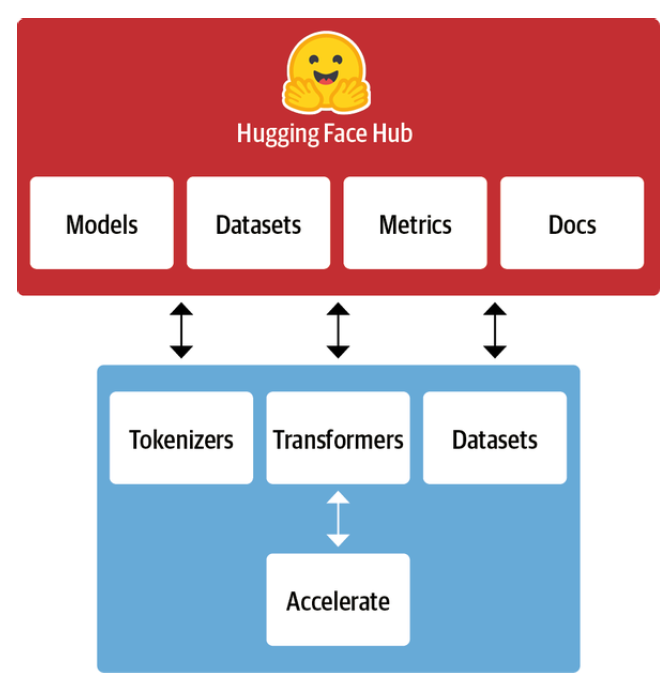

### **The Hugging Face Hub**

- As outlined earlier, transfer learning is one of the key factors driving the success of **transformers** because it makes it possible to reuse pretrained models for new tasks.

- Consequently, it is crucial to be able to load pretrained models quickly and run experiments with them.

- The Hugging Face Hub hosts over 20,000 freely available models.

- There are filters for tasks, frameworks, datasets, and more that are designed to help us navigate the Hub and quickly find promising candidates.

- In addition to model weights, the Hub also hosts datasets and scripts for computing metrics, which let us reproduce published results or leverage additional data for our application.

- Coolest features of the Hub is that we can try out any models directly through the various task-specific interactive widgets.

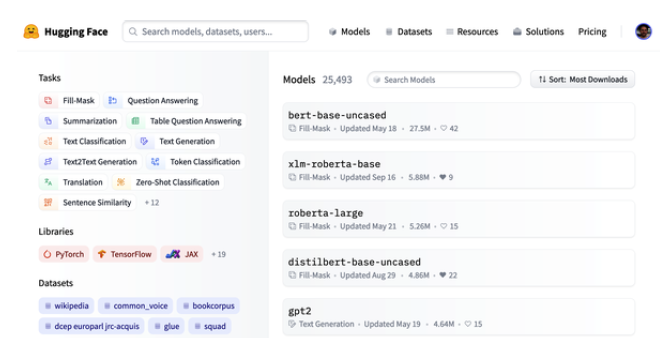

### **Hugging Face Tokenizers**

- Behind each of the pipeline examples that we have seen is a tokenization step that splits the raw text into smaller pieces called tokens.

- Tokens may be words, parts of words, or just characters like punctuation.

- Transformer models are trained on numerical representations of these tokens, so getting this step right is pretty important for the whole NLP project!

- [**Tokenizers**](https://github.com/huggingface/transformers) provides many tokenization strategies and is extremely fast at tokenizing text thanks to its Rust backend.

- It also takes care of all the pre- and postprocessing steps, such as normalizing the inputs and transforming the model outputs to the required format.

- With **Tokenizers**, we can load a tokenizer in the same way we can load pretrained model weights with **Transformers**.

### **Hugging Face Datatsets**

- Loading, processing, and storing datasets can be a cumbersome process, especially when the datasets get too large to fit in our laptop's RAM.

- In addition, we usually need to implement various scripts to download the data and transform it into a standard format.

- [**Datasets**](https://github.com/huggingface/datasets) simplifies this process by providing a standard interface for thousands of datasets that can be found on the [**Hub**](https://huggingface.co/datasets).

- It also provides smart caching (so we don't have to redo our processing each time we run our code) and avoids RAM limitations by leveraging a special mechanism called memory mapping that stores the contents of a file in virtual memory and enables multiple proceses to modify a file more efficiently.

- The library is also interoperable with popular frameworks like **Pandas** and **NumPy**.

------------------------------------------------------------------------------

- Having a good dataset and powerful model is worthless, however, if we can't reliably measure the performance.

- Unfortunately, classif NLP metrics come with many different implementations that can vary slighly and lead to deceptive results.

- By providing the scripts for many metrics, **Datasets** helps make experiments more reroducible and the results more trustworthy.

------------------------------------------------------------------------------

- With the **Transformers**, Tokenizers, and Datasets libraries we have everything we need to train our very own transformer models!

- However, there are situations where we need fine-grained control over the training loop.

- That's where the last library of the ecosystem comes into play: **Accelerate**

### **Hugging Face Accelerate**

- If we ever had to write our own training script in PyTorch, chances are that we had some headaches when trying to port the code that runs on our laptop to the code that runs on our organization's cluster.

- [**Accelerate**](https://github.com/huggingface/accelerate) adds a layer of abstraction to our normal training loops that takes care of all the custom logic necessary for the training infrastructure.

- This literally accelerate our workflow by simplifying the change of infrastructure when necessary.

##### **This sums up the core components of Hugging Face's open source ecosystem.**

In [ ]:
####################################################################################################################################################################################################
#                                                                                                                                                                                                  #
####################################################################################################################################################################################################

### **Main Challenges with Transformers**

- In this chapter we have- gotten a glimpse of the wide range of NLP tasks that can be tackled with transformer models.

- However, despite their usefulness, transformers are far from being a sliver bullet.

- Here are a few challenges associated with them:

#### **Language**

- NLP research is dominated by the English language.

- There are several models for other languages, but it is harder to find prertrained models for rare or low-resource languages.

#### **Data availability**

- Although we can use transfer learning to dramatically reduce the amount of labeled training data our models need, it is still a lot compared to how much a human needs to perform the task.

#### **Working with long documents**

- Self-attention works extremely well on paragraph-long texts, but it becomes very expensive when we move to longer texts like whole documents.

#### **Opacity**

- As with other deep learning models, transformers are to a large extent opaque.

- It is hard or impossible to unravel "Why" a model made a certain prediction.

- This is an especially hard challenge when these models are deployed to make critical decisions.

#### **Bias**

- Transformer models are predominantly pretrained on text data from the internet.

- This imprints all the biases that are present in the data into the models.

- Making sure that these are neither racist, sexist, or worse is a challenging task.

----------------------------------------------------------------------------------------------------------------------------------------------------------------
- Now that we are armed with the basic concepts behind transformers, it is time to get our hands dirty with our first application: **Text Classification**

In [ ]:
*******************************************************************************THE END**************************************************************************************************************